### Simple Linear Regression for predicting Big Mac price

Import data from https://github.com/TheEconomist/big-mac-data/raw/master/output-data/big-mac-adjusted-index.csv

In [1]:
!Pip install numpy
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


You should consider upgrading via the 'c:\python37\python.exe -m pip install --upgrade pip' command.


In [2]:
print({pd.__version__})
print({np.__version__})
print({sns.__version__})

{'1.0.3'}
{'1.18.4'}
{'0.10.1'}


In [4]:
url = 'https://github.com/TheEconomist/big-mac-data/raw/master/output-data/big-mac-adjusted-index.csv'
df=pd.read_csv(url, parse_dates=['date'])
df.head()

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,GDP_dollar,adj_price,USD,EUR,GBP,JPY,CNY
0,2011-07-01,ARG,ARS,Argentina,20.00,4.132500,4.839685,9138.177,3.149757,1.011,0.475,0.850,0.906,0.946
1,2011-07-01,AUS,AUD,Australia,4.56,0.922382,4.943724,55589.549,5.792526,0.117,-0.181,0.027,0.059,0.081
2,2011-07-01,BRA,BRL,Brazil,9.50,1.541600,6.162429,10816.487,3.245241,1.485,0.823,1.286,1.356,1.405
3,2011-07-01,GBR,GBP,Britain,2.39,0.614137,3.891637,36119.846,4.684831,0.087,-0.202,0.000,0.031,0.052
4,2011-07-01,CAN,CAD,Canada,4.73,0.945850,5.000793,46214.914,5.259173,0.244,-0.087,0.145,0.180,0.204


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 665 entries, 0 to 664
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           665 non-null    datetime64[ns]
 1   iso_a3         665 non-null    object        
 2   currency_code  665 non-null    object        
 3   name           665 non-null    object        
 4   local_price    665 non-null    float64       
 5   dollar_ex      665 non-null    float64       
 6   dollar_price   665 non-null    float64       
 7   GDP_dollar     665 non-null    float64       
 8   adj_price      665 non-null    float64       
 9   USD            665 non-null    float64       
 10  EUR            665 non-null    float64       
 11  GBP            665 non-null    float64       
 12  JPY            665 non-null    float64       
 13  CNY            665 non-null    float64       
dtypes: datetime64[ns](1), float64(10), object(3)
memory usage: 65.0+ KB


In [7]:
df =df[(df['date'].dt.year==2019)&(df['date'].dt.month==1)]
df.head()

,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,GDP_dollar,adj_price,USD,EUR,GBP,JPY,CNY
554,2019-01-01,ARG,ARS,Argentina,75.00,37.455000,2.002403,14462.920,3.165211,-0.419,-0.434,-0.338,-0.261,-0.396
555,2019-01-01,AUS,AUD,Australia,6.10,1.401640,4.352045,55692.730,4.945273,-0.192,-0.213,-0.080,0.028,-0.160
556,2019-01-01,BRA,BRL,Brazil,16.90,3.717950,4.545516,9895.765,2.968028,0.406,0.370,0.601,0.789,0.463
557,2019-01-01,GBR,GBP,Britain,3.19,0.783208,4.072992,39800.274,4.259130,-0.122,-0.145,0.000,0.117,-0.087
558,2019-01-01,CAN,CAD,Canada,6.77,1.331400,5.084873,45094.605,4.487708,0.040,0.013,0.185,0.323,0.082


### Explore Data

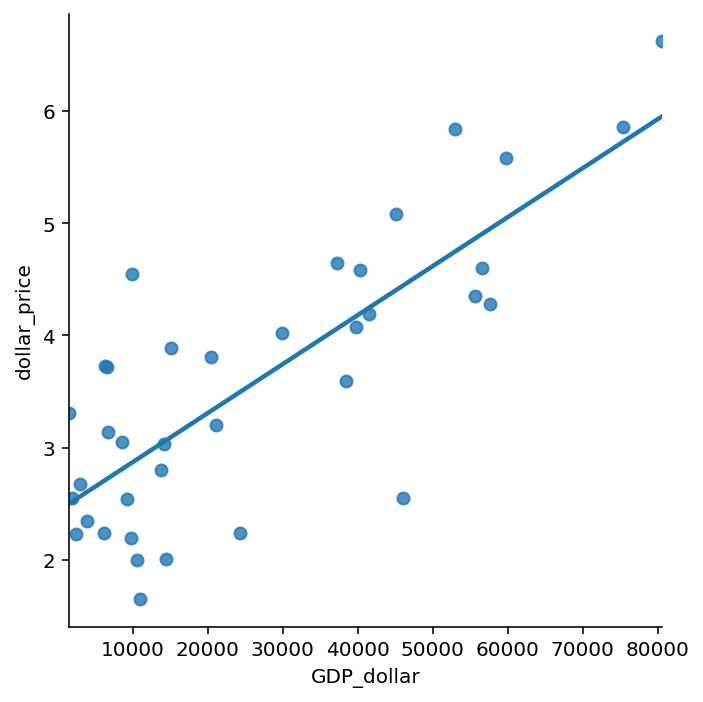

In [8]:
sns.lmplot(x='GDP_dollar',y='dollar_price',data=df, ci=None)

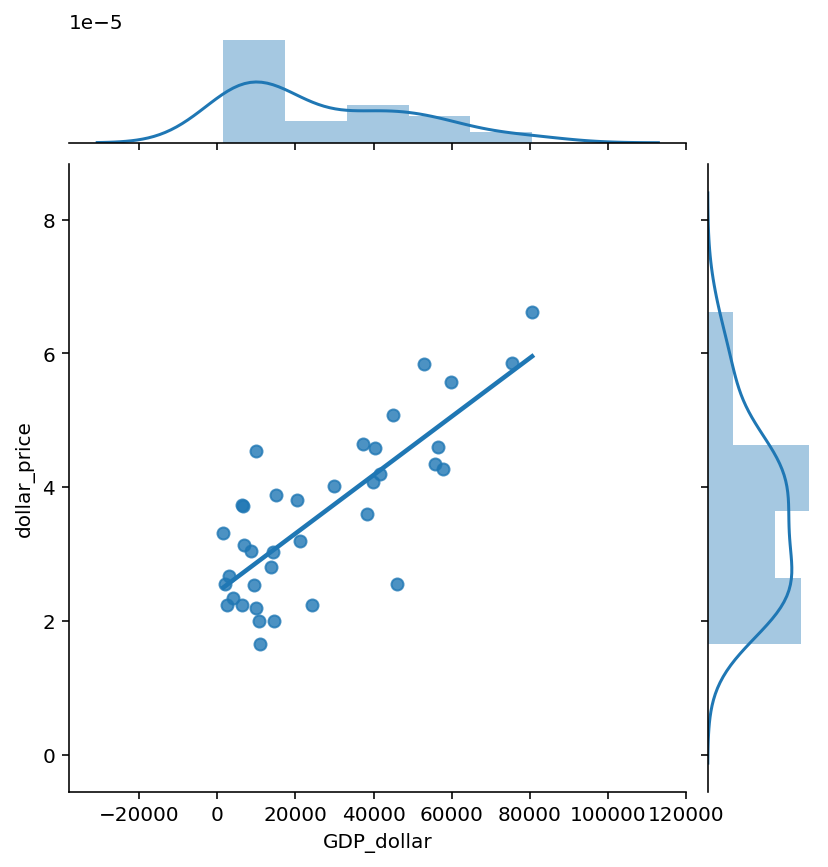

In [10]:
sns.jointplot(x='GDP_dollar', y='dollar_price', data =df,kind='reg', ci =None)

### Scikit-Learn : Linear Regression

In [11]:
import sklearn
from sklearn.linear_model import LinearRegression

In [12]:
print({sklearn.__version__})

{'0.23.1'}


In [13]:
model = LinearRegression()
model

LinearRegression()

In [15]:
x = df[['GDP_dollar']] #ต้องเป็น array 2 มิติ
y = df.dollar_price #เป็น series ถูกแล้ว

In [16]:
model.fit(x,y)

LinearRegression()

In [17]:
model.score(x,y) # R-squared

0.6312750690042254

In [18]:
model.intercept_

2.4327271614712926

In [19]:
model.coef_

array([4.36961383e-05])

### ทดลอง predict ราคาสินค้า จาก ค่า GDP ที่กำหนดขึ้นเอง 
   ##### Note : model.predict(x) : x ต้องเป็น array 2 dimensions เสมอ 

In [20]:
model.predict([[9000]])

array([2.82599241])

In [21]:
model.predict([[9000],[40000]])

array([2.82599241, 4.18057269])

In [22]:
np.arange(5000,50001,2500) #(start:ending+1:step)

array([ 5000,  7500, 10000, 12500, 15000, 17500, 20000, 22500, 25000,
       27500, 30000, 32500, 35000, 37500, 40000, 42500, 45000, 47500,
       50000])

In [24]:
model_test = np.arange(5000,50001,2500).reshape(-1,1)

In [25]:
model.predict(model_test)

array([2.65120785, 2.7604482 , 2.86968854, 2.97892889, 3.08816924,
       3.19740958, 3.30664993, 3.41589027, 3.52513062, 3.63437096,
       3.74361131, 3.85285166, 3.962092  , 4.07133235, 4.18057269,
       4.28981304, 4.39905338, 4.50829373, 4.61753407])

In [26]:
np.linspace(5000,50000,20)

array([ 5000.        ,  7368.42105263,  9736.84210526, 12105.26315789,
       14473.68421053, 16842.10526316, 19210.52631579, 21578.94736842,
       23947.36842105, 26315.78947368, 28684.21052632, 31052.63157895,
       33421.05263158, 35789.47368421, 38157.89473684, 40526.31578947,
       42894.73684211, 45263.15789474, 47631.57894737, 50000.        ])

In [27]:
np.linspace(5000,50000,20).reshape(-1,1)

array([[ 5000.        ],
       [ 7368.42105263],
       [ 9736.84210526],
       [12105.26315789],
       [14473.68421053],
       [16842.10526316],
       [19210.52631579],
       [21578.94736842],
       [23947.36842105],
       [26315.78947368],
       [28684.21052632],
       [31052.63157895],
       [33421.05263158],
       [35789.47368421],
       [38157.89473684],
       [40526.31578947],
       [42894.73684211],
       [45263.15789474],
       [47631.57894737],
       [50000.        ]])